# Validation of scales using external metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_val = pd.read_excel('data/validation.xlsx')

In [7]:
colormap = {
    'S': '#C8042C',
    'V': '#1A4289',
    'DF': '#265BA4',
    'EL': '#BF2850',
    'SF': '#B42D27',
    'KF': '#24573E',
    'RV': '#D82E8A',
    'LA': '#E7B657',
    'ALT': '#75FB4C',
    'NB': '#1E4B57',
    'KD': '#566197',
    'FG': '#E4F04E',
    'DD': '#3470BC',
    'M': '#7A308B',
    'SIU': 'lightgrey',
    'UFG': 'lightgrey'
}


In [9]:
df_val

,Partyname,Partyabb,Type_Values,Type_Populism,Type_Populist_Values,V1,V2,V4_Scale,V4_Bin,V4_Ord,...,V19,V20,V21,Elec_year,LSQINDEX,PG_left_right,PG_state_market,PG_liberty_authority,PG_eu_anti_pro,Popu_List
0,Unity List-Red Green Alliance,En-O,1,3,3,8.083333,8.090909,1.250000,0,1,...,4.000000,2.500000,1.500000,2015,0.524404,0.8912,1.2012,1.7524,0.9971,0
1,Danish People's Party,DF,2,4,4,8.666667,8.272727,4.000000,0,2,...,2.833333,3.166667,3.800000,2015,0.524404,8.2269,5.7081,7.8954,1.1830,1
2,Socialist People's Party,SF,1,2,1,8.153846,8.333333,2.333333,0,1,...,5.500000,2.428571,4.000000,2015,0.524404,2.1347,2.1035,2.1476,3.5917,0
3,Christian Democrats,KD,4,2,2,6.111111,7.000000,9.000000,1,4,...,5.750000,2.166667,3.500000,2015,0.524404,5.6982,5.0887,7.0474,5.8301,0
4,Social Democratic Party,SD,1,3,3,8.615385,7.583333,3.333333,0,2,...,6.000000,2.428571,5.666667,2015,0.524404,3.8011,3.5292,4.2722,7.4311,0
5,Conservative People's Party,C,4,2,2,8.083333,8.454545,7.142857,1,3,...,6.000000,2.428571,6.000000,2015,0.524404,7.2186,7.2931,6.5055,7.7791,0
6,"Left, Liberal Party of Denmark",V,3,2,1,8.307692,6.000000,7.000000,1,3,...,5.000000,2.428571,6.333333,2015,0.524404,7.2920,7.3696,4.9957,9.0268,0
7,Liberal Alliance,LA,3,3,3,7.800000,3.111111,8.700000,1,4,...,4.800000,2.000000,3.250000,2015,0.524404,NaN,NaN,NaN,NaN,0
8,Alternative,A,1,2,1,7.600000,4.571429,3.200000,0,2,...,3.833333,2.857143,1.750000,2015,0.524404,NaN,NaN,NaN,NaN,0
9,Radical Left,RV,3,1,1,8.384615,7.916667,6.000000,1,3,...,7.000000,2.571429,4.500000,2015,0.524404,NaN,NaN,NaN,NaN,0


In [16]:
df_val['Partyabb'] = [
    'EL',
    'DF',
    'SF',
    'KD',
    'S',
    'KF',
    'V',
    'LA',
    'ALT',
    'RV'
]

df_val['color'] = df_val['Partyabb'].map(colormap)

In [159]:
list(df_val.columns)

['Partyname',
 'Partyabb',
 'Type_Values',
 'Type_Populism',
 'Type_Populist_Values',
 'V1',
 'V2',
 'V4_Scale',
 'V4_Bin',
 'V4_Ord',
 'V5',
 'V6_Scale',
 'V6_Bin',
 'V6_Ord',
 'V7',
 'V8_Scale',
 'V8_Bin',
 'V8_Ord',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'Elec_year',
 'LSQINDEX',
 'PG_left_right',
 'PG_state_market',
 'PG_liberty_authority',
 'PG_eu_anti_pro',
 'Popu_List',
 'color']

In [261]:
val_cols = ['V6_Scale', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17']

df_val['values'] = df_val[val_cols].mean(axis=1)

In [262]:
df_val['values']

0    1.956730
1    5.401058
2    2.723425
3    4.805556
4    3.647487
5    4.739947
6    4.182981
7    4.652116
8    2.124647
9    2.420138
Name: values, dtype: float64

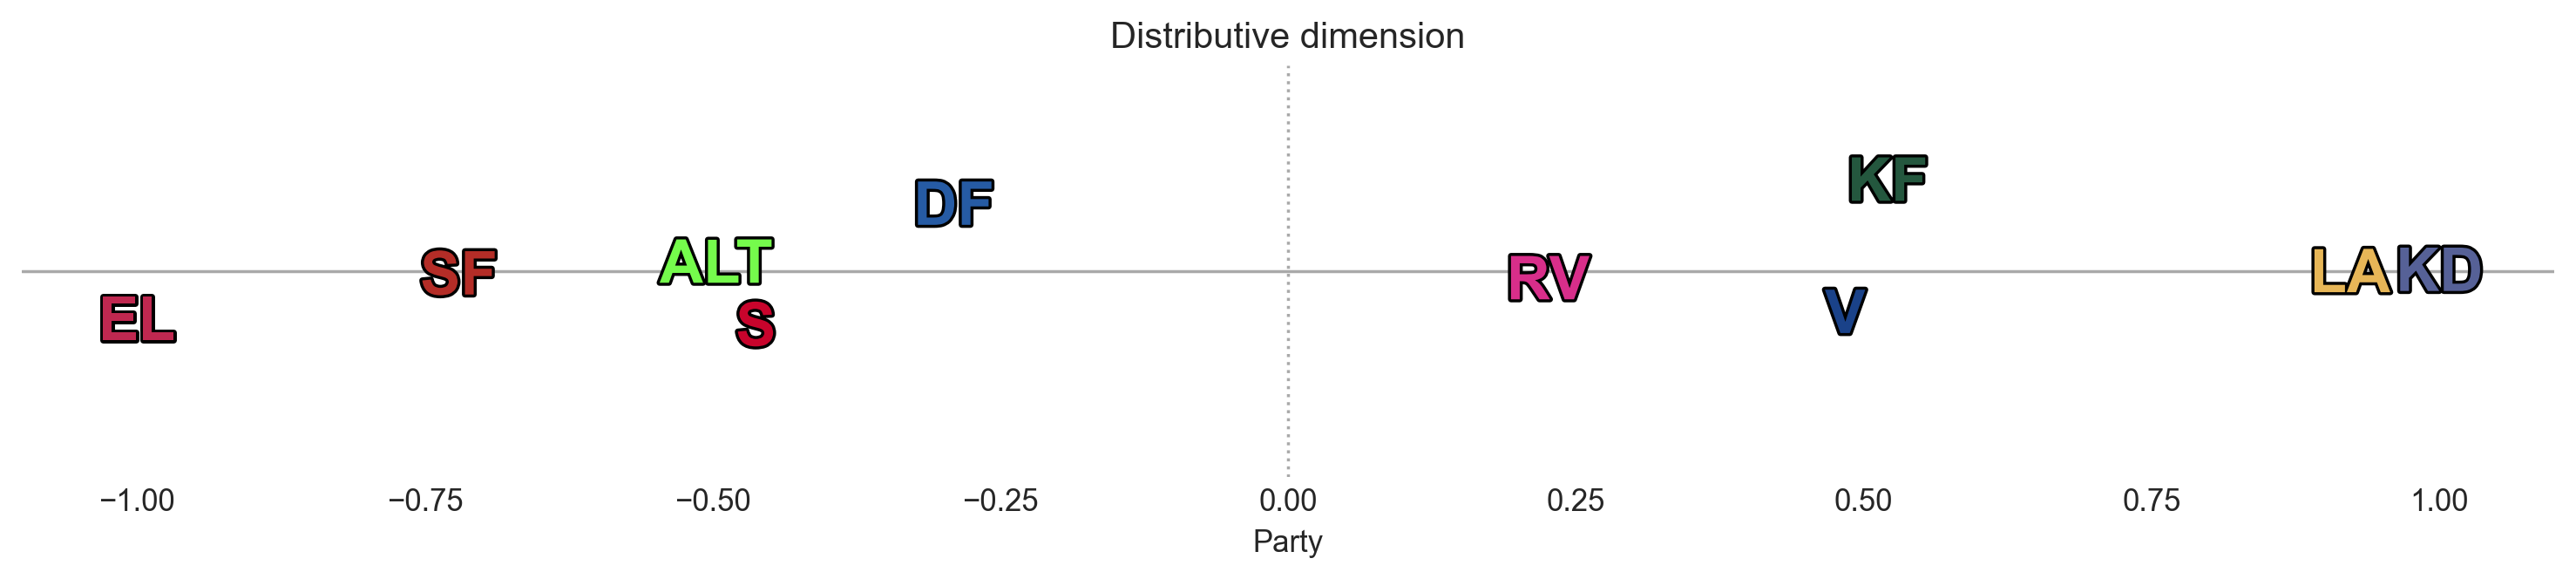

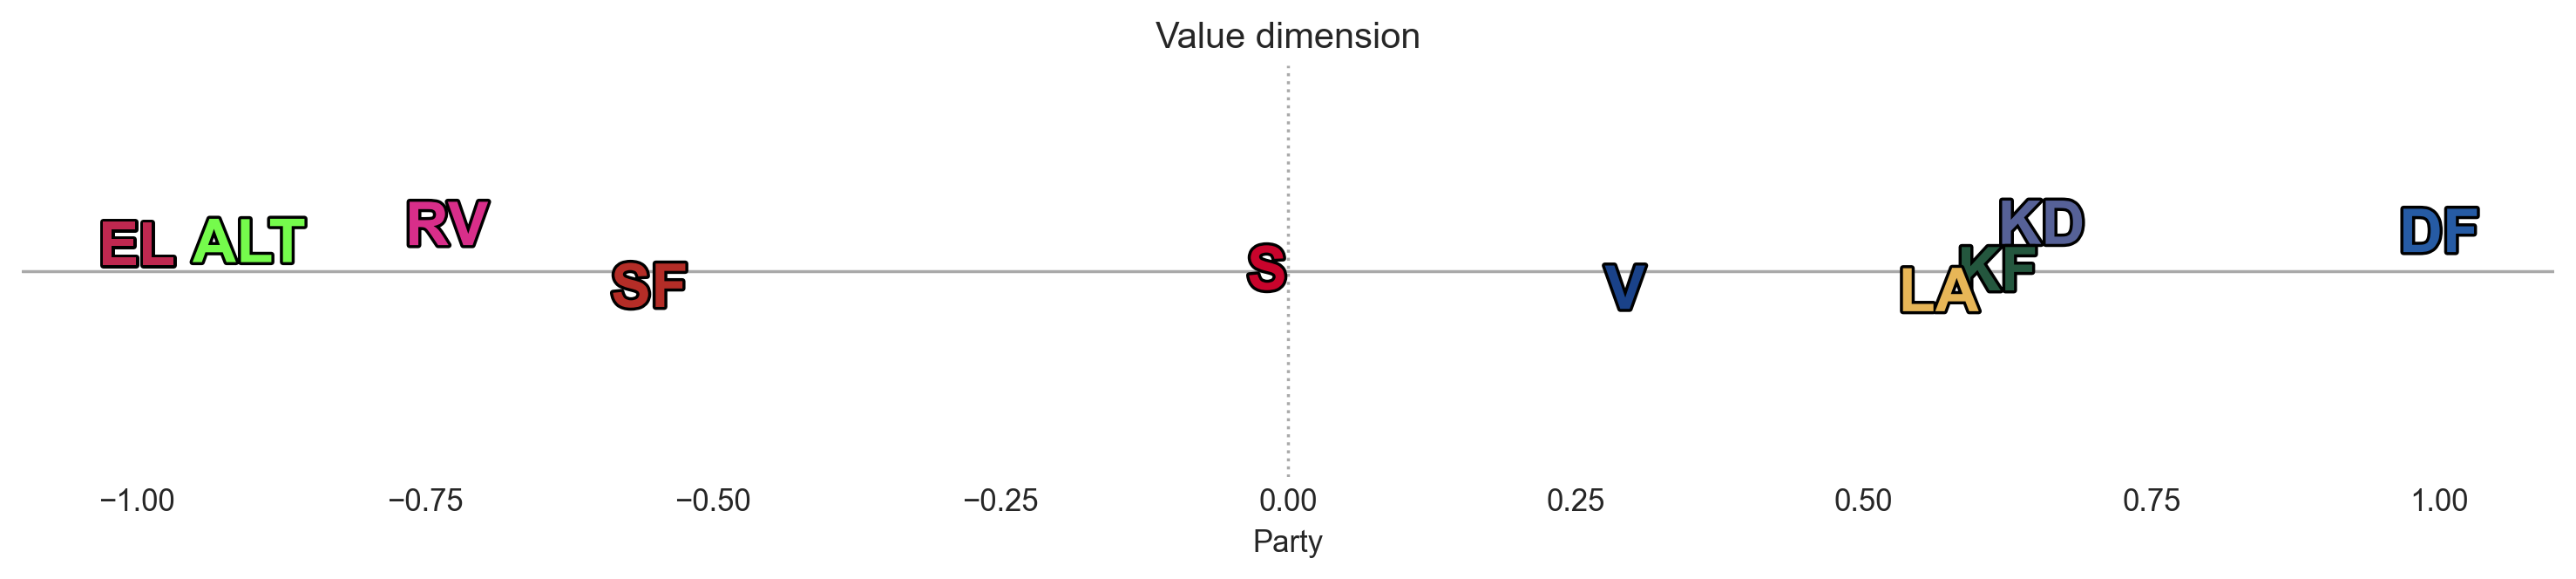

In [263]:
plt.style.use('seaborn-whitegrid')
import matplotlib.patheffects as pe
plt.rcParams['figure.dpi'] = 250

# define a funciton that takes a column from df_val and plots it as as sorted bar chart
def plot_bar(df, col, title, xlabel, ylabel, color):
    df = df.sort_values(col, ascending=False)
    plt.figure(figsize=(10, 6))
    plt.bar(df['Partyabb'], rescale(df[col]), color=df[color])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# define a funciton to plot the same data as a 1-dimensional dot plot
def plot_dot(df, col, title, xlabel, color, jitter=False):
    plt.figure(figsize=(15, 2.5))
    if jitter:
        y_jitter = np.random.normal(scale=0.001, size=len(df[col]))
        plt.scatter(rescale(df[col]), y_jitter, color='white')
    else:
        plt.scatter(rescale(df[col]), np.zeros_like(rescale(df[col])), color=df[color])

    # add party labels
    for i, txt in enumerate(df['Partyabb']):
            plt.text(rescale(df[col])[i], y_jitter[i], txt, ha='center', va='center', fontsize=20, color=df[color][i], weight='bold', path_effects=[pe.withStroke(linewidth=2, foreground='black')])
    
    plt.grid(False)
    plt.box(False)
    plt.yticks([])
    
    plt.axhline(y=0, color='darkgrey', linewidth=1)
    plt.axvline(x=0, color='darkgrey', linewidth=1, linestyle=':')

    plt.ylim(-0.005, 0.005)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()

# define a function that takes a variable and rescales it to the range -1 to 1
def rescale(var):
    var = (var - var.min()) / (var.max() - var.min())
    var = 2 * var - 1
    return var

plot_dot(df_val, col = 'V4_Scale', title = 'Distributive dimension', xlabel = 'Party', color = 'color', jitter=True)
plot_dot(df_val, col = 'values', title = 'Value dimension', xlabel = 'Party', color = 'color', jitter=True)

In [334]:
df_test = pd.read_csv('data/plot_data_test.csv').drop(columns=['Unnamed: 0'])
df_test = df_test[~df_test['party'].isin(['NB', 'FG', 'DD', 'M', 'SIU', 'UFG'])].reset_index(drop=True)
df_test['color'] = df_test['party'].map(colormap)

In [335]:
df_test

,V4_scale,value,party,color
0,0.034175,0.291931,S,#C8042C
1,0.815232,-0.373644,V,#1A4289
2,-0.063365,-0.476031,DF,#265BA4
3,-1.000000,0.540653,EL,#BF2850
4,0.263869,0.349143,RV,#D82E8A
5,-0.522205,0.394392,SF,#B42D27
6,0.532829,-0.500946,KF,#24573E
7,0.934793,-0.441602,LA,#E7B657
8,-0.269803,0.733495,ALT,#75FB4C
9,0.252202,0.087570,KD,#566197


In [336]:
# remove KD from both df_test and df_val and reset index:
df_test = df_test[~df_test['party'].isin(['KD'])].reset_index(drop=True)
df_val = df_val[~df_val['Partyabb'].isin(['KD'])].reset_index(drop=True)

In [341]:
# join the two dataframes by party name
df = df_test.merge(df_val, left_on='party', right_on='Partyabb')
df = df[['party', 'color_y', 'V4_Scale', 'V4_scale', 'values', 'value']]

In [345]:
for col in ['V4_Scale', 'values']:
    df[col] = rescale(df[col])

In [346]:
df

,party,color_y,V4_Scale,V4_scale,values,value
0,S,#C8042C,-0.440716,0.034175,-0.018237,0.291931
1,V,#1A4289,0.543624,0.815232,0.292705,-0.373644
2,DF,#265BA4,-0.261745,-0.063365,1.000000,-0.476031
3,EL,#BF2850,-1.000000,-1.000000,-1.000000,0.540653
4,RV,#D82E8A,0.275168,0.263869,-0.730915,0.349143
5,SF,#B42D27,-0.709172,-0.522205,-0.554807,0.394392
6,KF,#24573E,0.581975,0.532829,0.616116,-0.500946
7,LA,#E7B657,1.000000,0.934793,0.565116,-0.441602
8,ALT,#75FB4C,-0.476510,-0.269803,-0.902496,0.733495


In [347]:
# pearson correlation between V4 for validation and test data
from scipy.stats import pearsonr
print(pearsonr(df['V4_Scale'], df['V4_scale']))
print(pearsonr(df['values'], -df['value']))

(0.9646349530385545, 2.6455700763197402e-05)
(0.9460668019581976, 0.00011377284586484798)


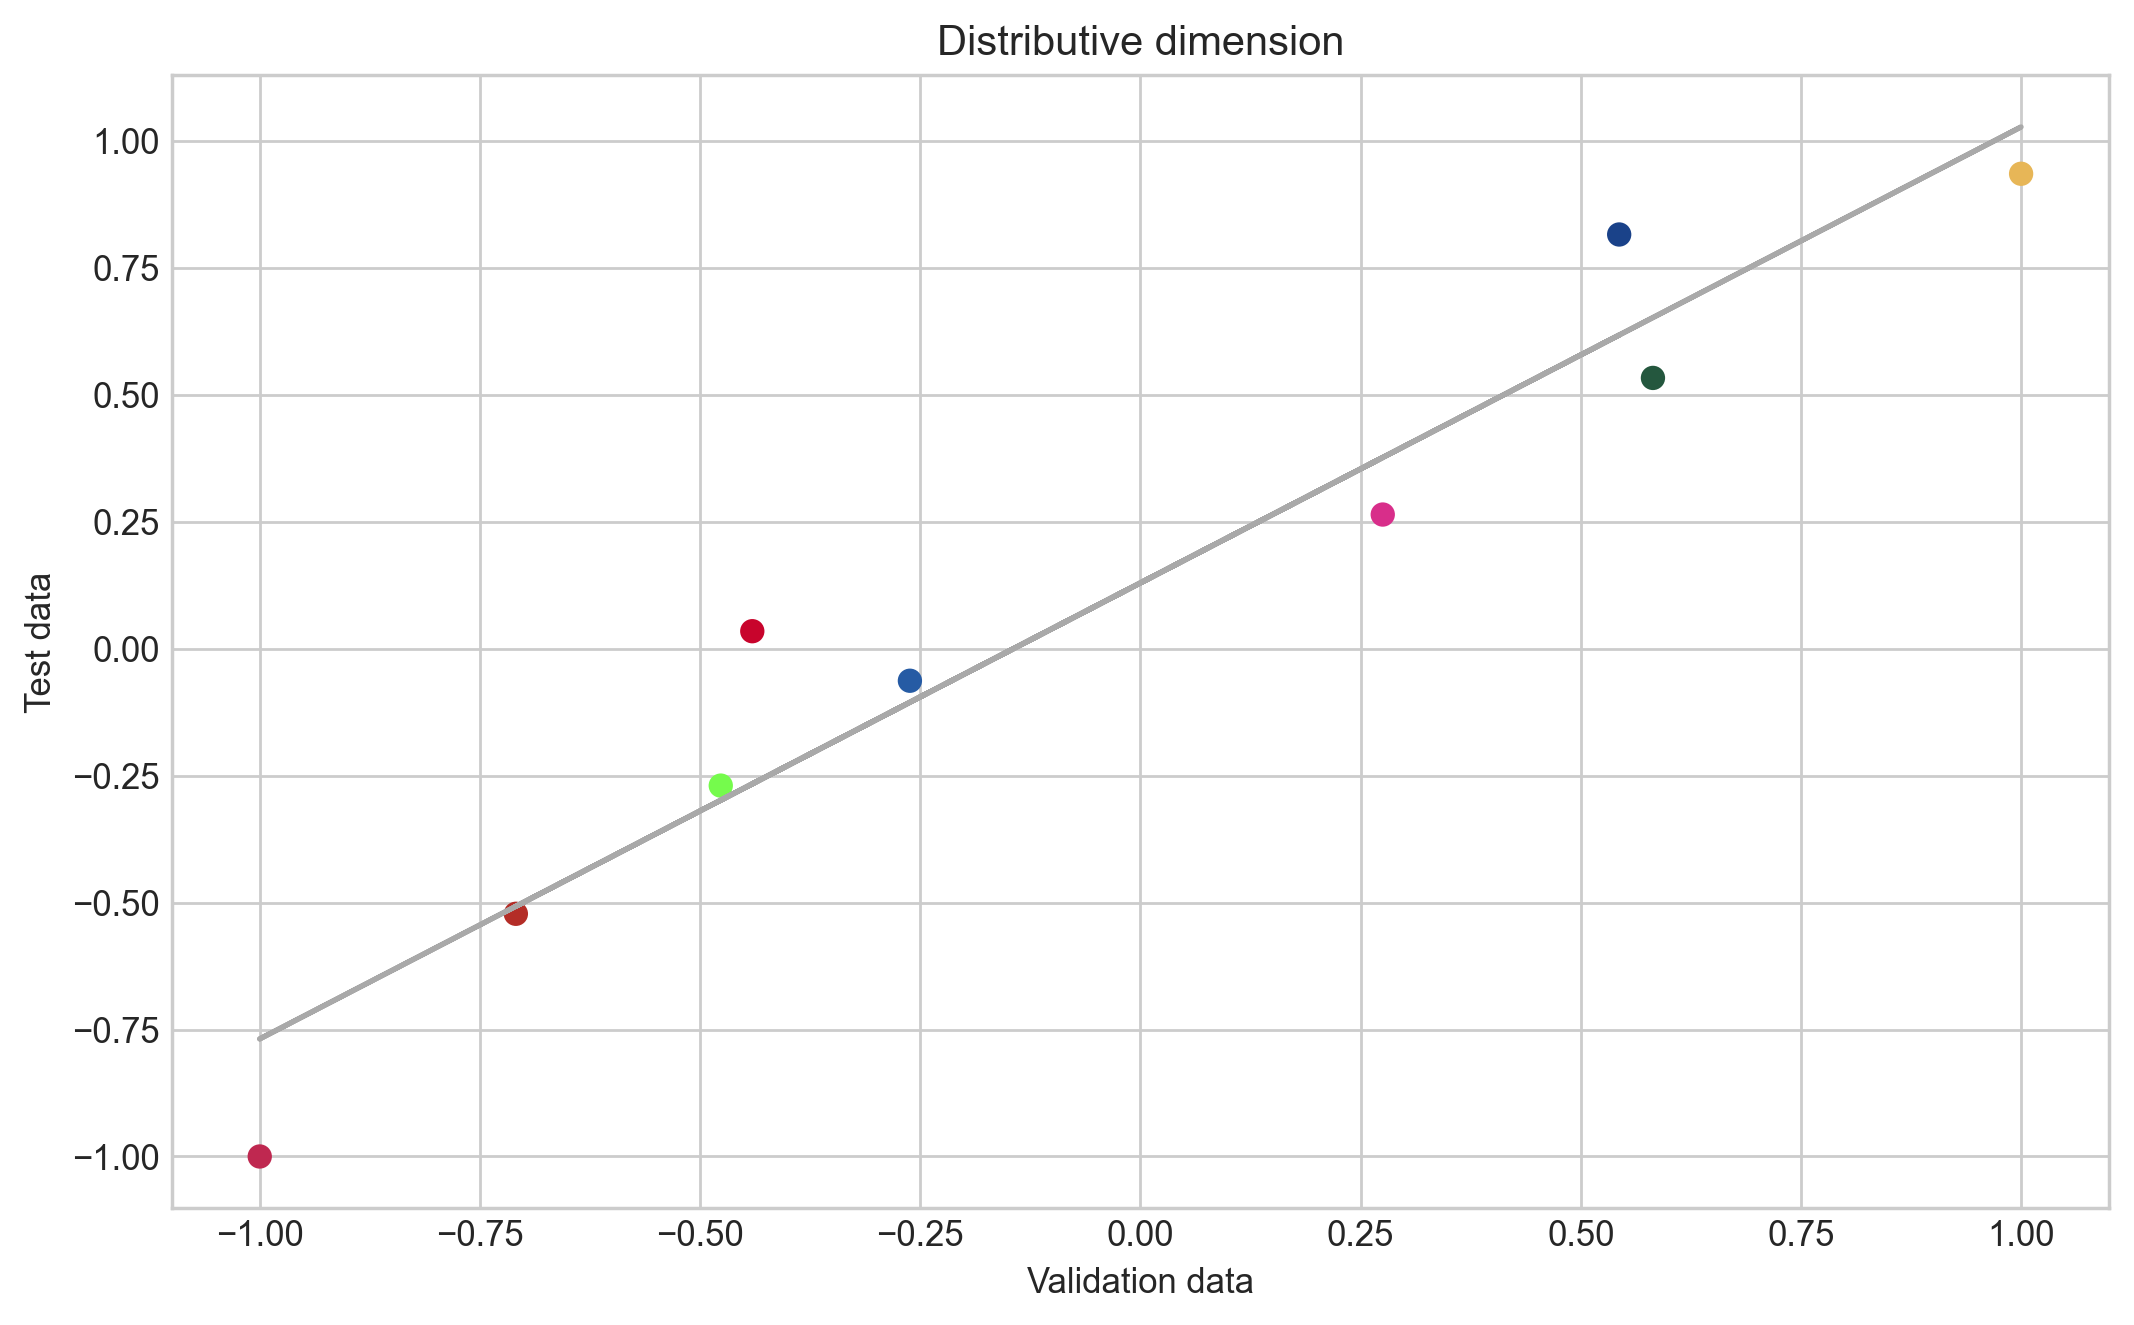

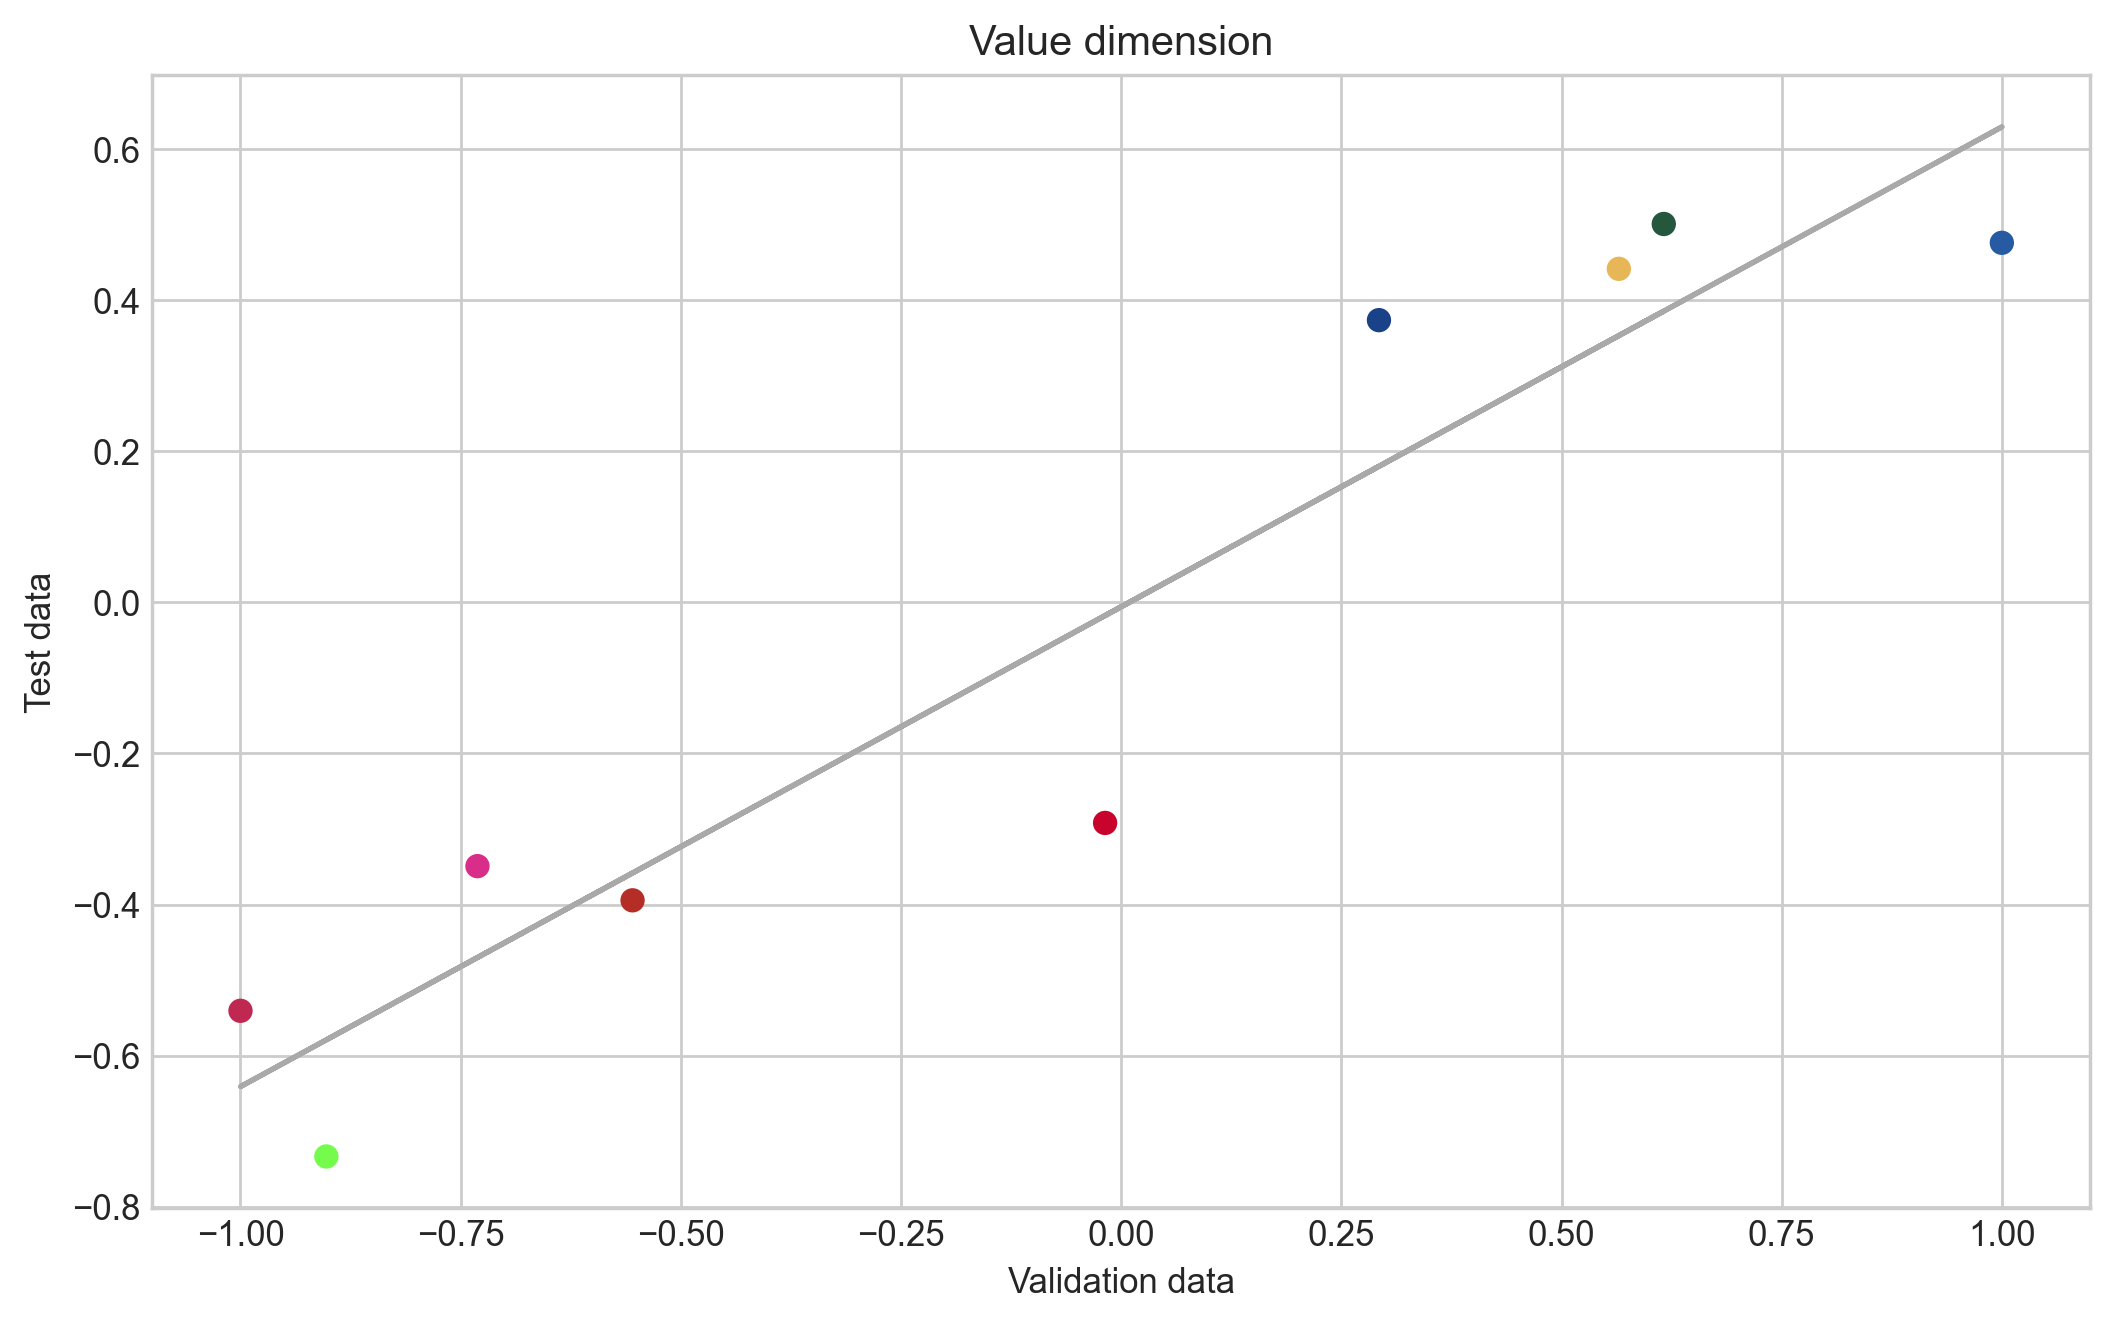

In [352]:
# plot  V4_Scale and V4_scale against each other
plt.figure(figsize=(10, 6))
plt.scatter(df['V4_Scale'], df['V4_scale'], color=df['color_y'])
plt.title('Distributive dimension')
plt.xlabel('Validation data')
plt.ylabel('Test data')
# add regline
m, b = np.polyfit(df['V4_Scale'], df['V4_scale'], 1)
plt.plot(df['V4_Scale'], m*df['V4_Scale'] + b, color='darkgrey')
plt.show()

# plot  values and value against each other
plt.figure(figsize=(10, 6))
plt.scatter(df['values'], -df['value'], color=df['color_y'])
plt.title('Value dimension')
plt.xlabel('Validation data')
plt.ylabel('Test data')
# add regline
m, b = np.polyfit(df['values'], -df['value'], 1)
plt.plot(df['values'], m*df['values'] + b, color='darkgrey')
plt.show()

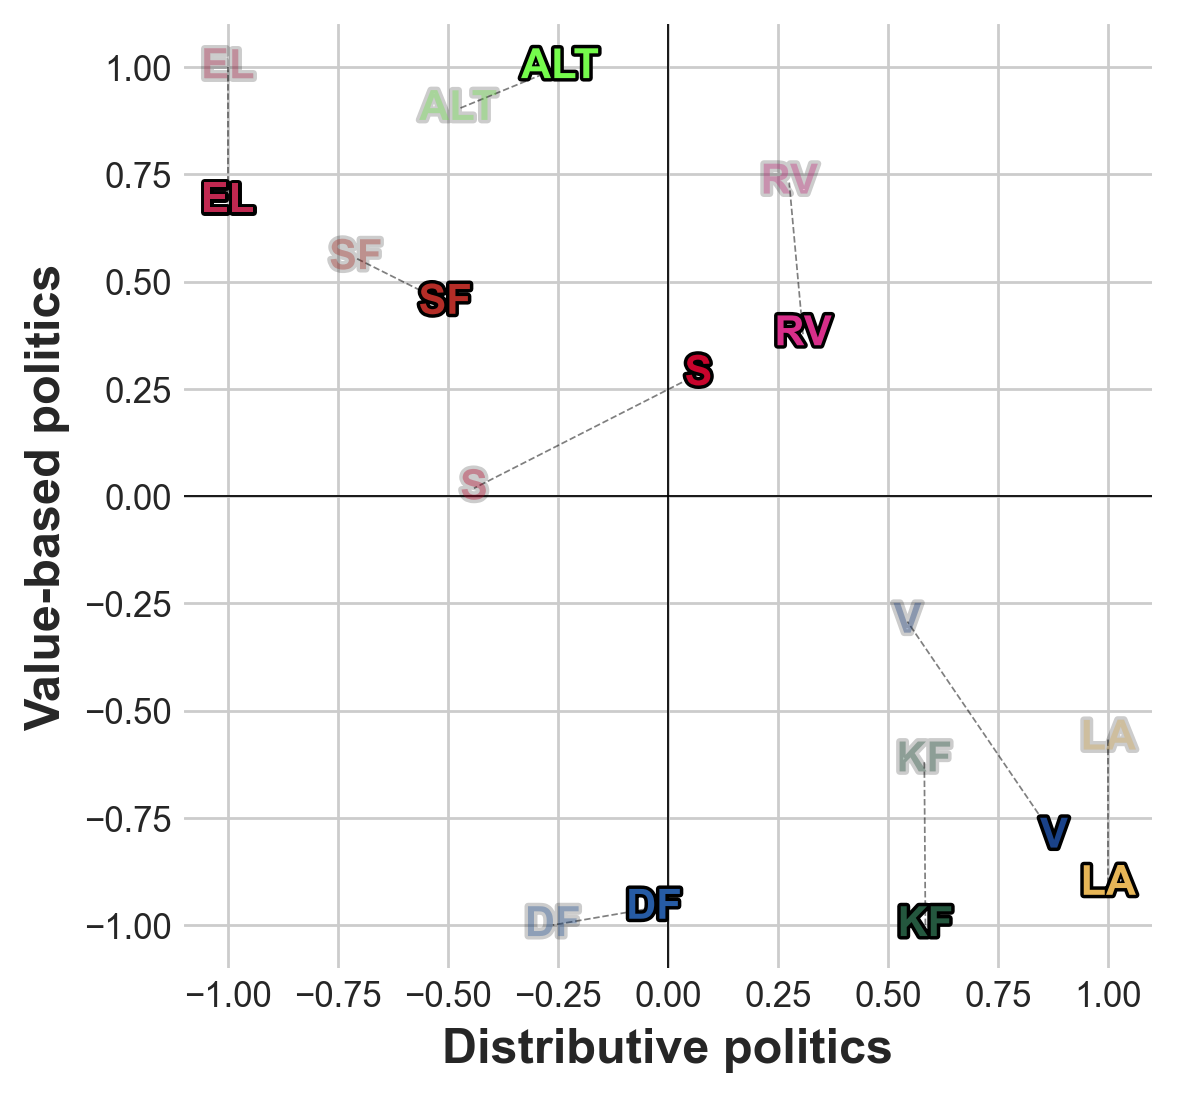

In [270]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_xlabel('Distributive politics', size = 14, weight = 'bold')
ax.set_ylabel('Value-based politics', size = 14, weight = 'bold')

ax.scatter(rescale(df_val['V4_Scale']), -rescale(df_val['values']), s=50, alpha=0.75, color='none')
ax.scatter(rescale(df_test['V4_scale']), rescale(df_test['value']), s=50, alpha=0.75, color='none')

# add party labels
for i, txt in enumerate(df_val['Partyabb']):
    ax.text(rescale(df_val['V4_Scale'])[i], -rescale(df_val['values'])[i], txt, ha='center', va='center', fontsize=12, color=df_val['color'][i], alpha=.2, weight='bold', path_effects=[pe.withStroke(linewidth=2, foreground='black', alpha=.2)])

for i, txt in enumerate(df_test['party']):
    ax.text(rescale(df_test['V4_scale'])[i], rescale(df_test['value'])[i], txt, ha='center', va='center', fontsize=12, color=df_test['color'][i], alpha=1, weight='bold', path_effects=[pe.withStroke(linewidth=2, foreground='black', alpha=1)])

# add line segments between the same party from df_test and df_val
for i, txt in enumerate(df_test['party']):
    ax.plot([rescale(df_test['V4_scale'])[i], rescale(df_val['V4_Scale'])[df_val['Partyabb'] == txt].values[0]], [rescale(df_test['value'])[i], -rescale(df_val['values'])[df_val['Partyabb'] == txt].values[0]], color='black', alpha=0.5, linewidth=0.5, linestyle = '--')

# add vline to plot
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
ax.axhline(y=-0, color='black', linestyle='-', linewidth=0.5)

for spine in ax.spines.values():
    spine.set_visible(False)

# Show the plot
plt.show()

## ATTEMPT AT VALIDATION WITH SCRAPED MP OPINIONS

In [361]:
import json

# load json
with open('validation/candidate_test.json') as f:
    data = json.load(f)

# create dataframe
can = pd.DataFrame(data)

In [363]:
can.shape

(123, 15)

In [ ]:
9000100 København
9000200 Københavns Omegn
9000300 Nordsjælland
9000400 Bornholm
9000500 Sjælland
9000600 Fyn
9000700 Sydjylland
9000800 Østjylland
9000900 Vestjylland
9001000 Nordjylland